In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.graphics.api as smg
import statsmodels.formula.api as smf

sns.set_style('whitegrid')

In [2]:
from dasc512 import *

# Data Generation

This is already done for you in the csv files for this lesson, but if you want to see where it came from, here it is. If you run it all again, you'll get different data because it's random.

## Ideal

In [3]:
# Generate predictor variables
n=200
means = [20, 0, 10, 5]
scales = [1, 5, 3, 10]
x = np.zeros((n, len(scales)))
for ii in range(len(scales)):
    x[:,ii] = stats.norm(loc=means[ii], scale=scales[ii]).rvs(size=n)

In [4]:
# Generate response variable
betas = np.array([[7,-3,2,0]]).transpose()
sigma = 5
y = np.matmul(x,betas) + stats.norm(scale=sigma).rvs(size=n).reshape((n,1))

In [5]:
# Create DataFrame and csv
df1 = pd.DataFrame(data=x, columns=['X1','X2','X3','X4'])
df1['Y'] = y
# df1.to_csv('example1.csv', index=False)

## Log transform on Y

In [6]:
# Generate predictor variables
n=200
means = [0.2, 0, 0.10, 0.5]
scales = [0.1, 0.05, 0.3, 10]
x = np.zeros((n, len(scales)))
for ii in range(len(scales)):
    x[:,ii] = stats.norm(loc=means[ii], scale=scales[ii]).rvs(size=n)

In [7]:
# Generate response variable
betas = np.array([[7, -3, 2, 0]]).transpose()
sigma = 0.5
y = np.exp(np.matmul(x,betas) + stats.norm(scale=sigma).rvs(size=n).reshape((n,1)))

In [8]:
# Create DataFrame and csv
df2 = pd.DataFrame(data=x, columns=['X1','X2','X3','X4'])
df2['Y'] = y
# df2.to_csv('example2.csv', index=False)

## Inverse transform on Y

In [9]:
# Generate predictor variables
n=200
means = [20, 0, 10, 5]
scales = [1, 5, 3, 10]
x = np.zeros((n, len(scales)))
for ii in range(len(scales)):
    x[:,ii] = stats.norm(loc=means[ii], scale=scales[ii]).rvs(size=n)

In [10]:
# Generate response variable
betas = np.array([[7,-3,2,0]]).transpose()
sigma = 4
y = (np.matmul(x,betas) + stats.norm(scale=sigma).rvs(size=n).reshape((n,1))) ** -1

In [11]:
# Create DataFrame and csv
df3 = pd.DataFrame(data=x, columns=['X1','X2','X3','X4'])
df3['Y'] = y
#df3.to_csv('example3.csv', index=False)

## Square root transform on Y

In [12]:
# Generate predictor variables
n=200
means = [20, 0, 10, 5]
scales = [1, 5, 3, 10]
x = np.zeros((n, len(scales)))
for ii in range(len(scales)):
    x[:,ii] = stats.norm(loc=means[ii], scale=scales[ii]).rvs(size=n)

In [13]:
# Generate response variable
betas = np.array([[7,-3,2,0]]).transpose()
sigma = 8
y = (np.matmul(x,betas) + stats.norm(scale=sigma).rvs(size=n).reshape((n,1))) ** 2

In [14]:
# Create DataFrame and csv
df4 = pd.DataFrame(data=x, columns=['X1','X2','X3','X4'])
df4['Y'] = y
#df4.to_csv('example4.csv', index=False)

## Square transform on Y

In [15]:
# Generate predictor variables
n=200
means = [20, 0, 10, 5]
scales = [1, 5, 3, 10]
x = np.zeros((n, len(scales)))
for ii in range(len(scales)):
    x[:,ii] = stats.norm(loc=means[ii], scale=scales[ii]).rvs(size=n)

In [16]:
# Generate response variable
betas = np.array([[7,-3,2,0]]).transpose()
sigma = 2
y = (np.matmul(x,betas) + stats.norm(scale=sigma).rvs(size=n).reshape((n,1))) ** 0.5

In [17]:
# Create DataFrame and csv
df5 = pd.DataFrame(data=x, columns=['X1','X2','X3','X4'])
df5['Y'] = y
#df5.to_csv('example5.csv', index=False)

## Everything needs log transform (or does it?)

In [18]:
n=200
means = [2, 3, 1, 5]
scales = [1, 2, 0.5, 1]
x = np.zeros((n,len(scales)))
for ii in range(len(scales)):
    x[:,ii] = np.exp(stats.norm(loc=means[ii], scale=scales[ii]).rvs(size=n))

In [19]:
betas = np.array([[3,1,2,0]]).transpose()
sigma = 100
y = sigma**2 + np.matmul(x,betas) + stats.norm(scale=sigma).rvs(size=n).reshape((n,1))

In [20]:
df6 = pd.DataFrame(data=x, columns=['X1','X2','X3','X4'])

In [21]:
df6['Y'] = y

In [22]:
# df6.to_csv('example6.csv', index=False)

# Ok, start here

For transparency, let's code our own Box-Cox transformation formula and Box-Cox inverse formula. Notice that the values must all be positive to use this for non-integer, non-zero values of $\lambda$.

The Box-Cox transform is: 

$f_{BC}(y) = \frac{y^\lambda - 1}{\lambda}$ if $\lambda\neq0$, 

$f_{BC}(y)=\ln{(y)}$ if $\lambda=0$.

That means that the inverse transform is: 

$f^{-1}_{BC}(y) = (\lambda y + 1) ^ {1/\lambda}$ if $\lambda\neq0$,

$f^{-1}_{BC}(y) = e^y$ if $\lambda=0$.

In [23]:
def bc(y, lamb):
    import numpy as np
    y = np.array(y)
    if lamb == 0:
        return np.log(y)
    else:
        return (y ** lamb - 1) / lamb
    
def bc_inv(y, lamb):
    import numpy as np
    y = np.array(y)
    if lamb == 0:
        return np.exp(y)
    else:
        return (lamb * y + 1) ** (lamb**-1)

We can confirm that these work correctly and equivalently to stats.boxcox.

In [24]:
stats.boxcox([5,3,1], lmbda=3)

array([41.33333333,  8.66666667,  0.        ])

In [25]:
bc([5,3,1], 3)

array([41.33333333,  8.66666667,  0.        ])

In [26]:
bc_inv([41 + 1/3, 8 + 2/3, 0], 3)

array([5., 3., 1.])

Ok, let's look at the ideal candidates for various values of $\lambda$.

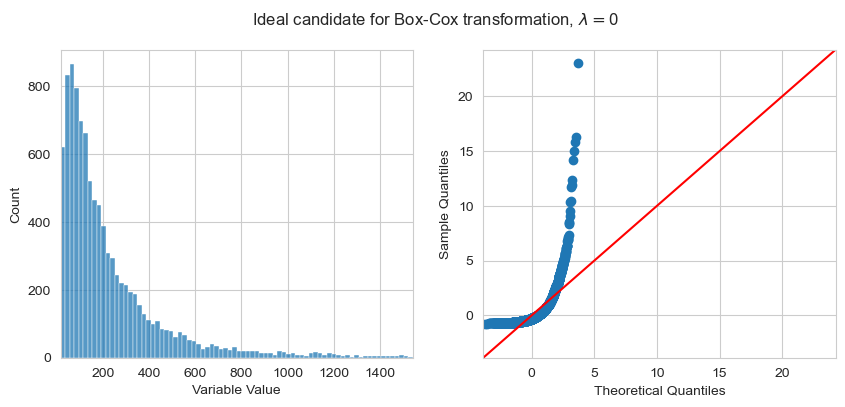

In [27]:
lamb = 0

y = stats.norm(loc=5, scale=1).rvs(size=10000)
y_bc = bc_inv(y, lamb)
xlim = [np.percentile(y_bc, 1), np.percentile(y_bc, 99)]
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.histplot(x=y_bc, binrange=xlim, ax=ax[0])
ax[0].set_xlim(xlim)
ax[0].set_xlabel('Variable Value')
fig.suptitle(f'Ideal candidate for Box-Cox transformation, $\lambda= ${lamb}')
smg.qqplot(y_bc, fit=True, line='45', ax=ax[1])
plt.show()

# When do we apply it in regression?

Let's look at some data.

## Data Set 1

In [28]:
df1 = pd.read_csv('example1.csv')

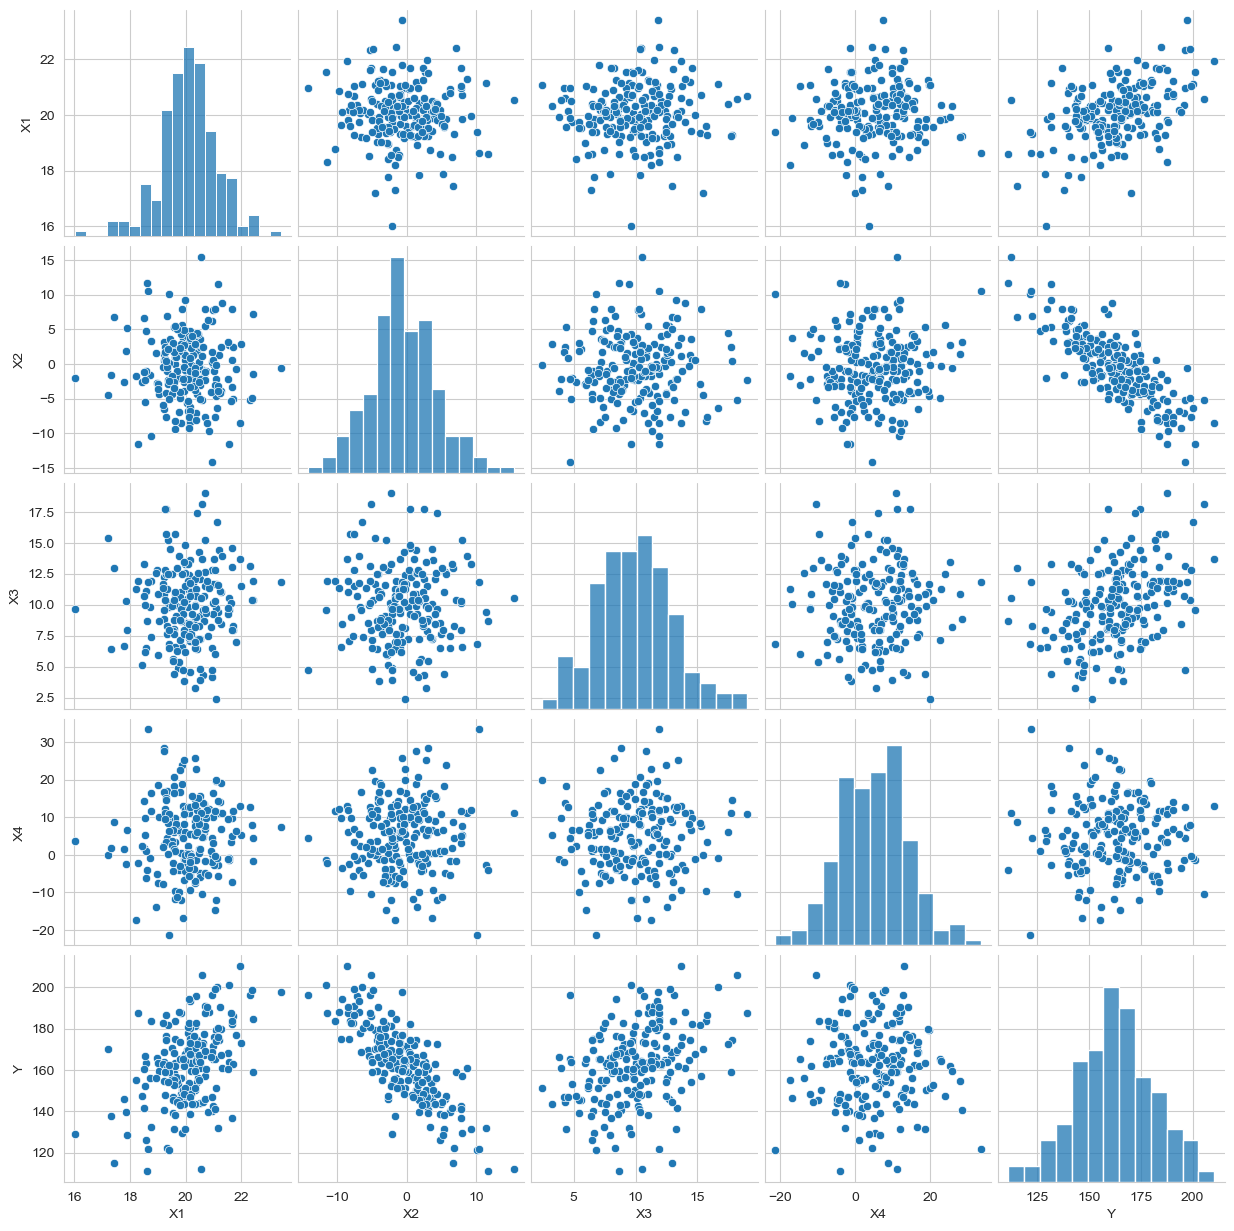

In [29]:
sns.pairplot(df1)
plt.show()

In [30]:
model = smf.ols('Y ~ X1 + X2 + X3 + X4', df1).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.929    
Dependent Variable: Y                AIC:                1211.8467
Date:               2022-12-09 12:58 BIC:                1228.3383
No. Observations:   200              Log-Likelihood:     -600.92  
Df Model:           4                F-statistic:        654.3    
Df Residuals:       195              Prob (F-statistic): 9.05e-112
R-squared:          0.931            Scale:              24.451   
-------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept    -4.9041    6.8747   -0.7134  0.4765  -18.4625   8.6542
X1            7.2730    0.3397   21.4083  0.0000    6.6030   7.9431
X2           -3.0354    0.0728  -41.6889  0.0000   -3.1790  -2.8918
X3            2.0056    0.1144   17.5353  0.0000    1.7800   2.2311
X4           -0.0400    0.0378   -1.0569  0.2919   -0.1145   0.0346
------------------------------------------------------------------
Omnibus:               1.203        Durbin-Watson:           2.174
Prob(Omnibus):         0.548        Jarque-Bera (JB):        1.127
Skew:                  0.001        Prob(JB):                0.569
Kurtosis:              2.632        Condition No.:           456  
==================================================================

"""

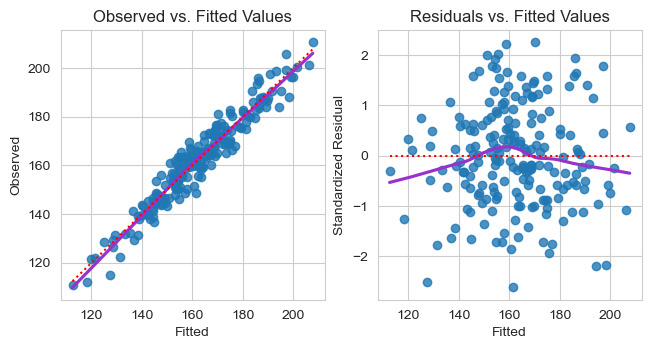

In [31]:
linearity_test(model, df1['Y'])
plt.show()


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  2.865641
p-value                        0.580556
f-value                        0.708654
f p-value                      0.586908

 Goldfeld-Quandt test ----
                value
F statistic  0.979218
p-value      0.540652

 Residuals plots ----


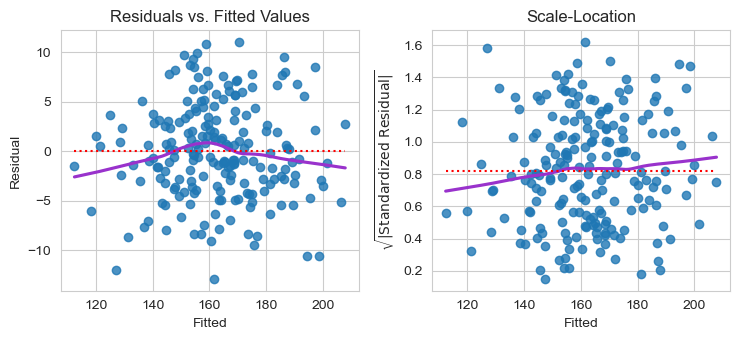

In [32]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9931, p-value: 0.4786
D'Agostino-Pearson Omnibus test ---- statistic: 1.2027, p-value: 0.5481
Lilliefors test ---- statistic: 0.0407, p-value: 0.5882
Jarque-Bera test ---- statistic: 1.1269, p-value: 0.5692399461378347
Kolmogorov-Smirnov test ---- statistic: 0.0403, p-value: 0.8889
Anderson-Darling test ---- statistic: 0.3068, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


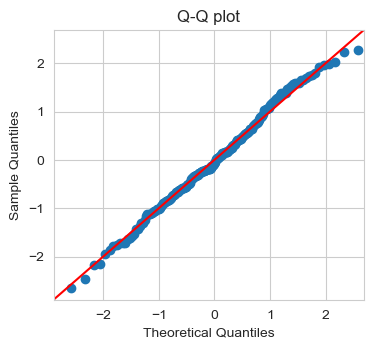

In [33]:
normality_of_residuals_test(model)
plt.show()

In [34]:
model.params

Intercept   -4.904148
X1           7.273050
X2          -3.035441
X3           2.005564
X4          -0.039963
dtype: float64

The true model was $y = 7x_1 – 3x_2 + 2x_3 + N(\mu=0, \sigma=5)$

Ok, so that didn't require any transformations. Let's try another.

## Data Set 2

In [35]:
df2 = pd.read_csv('example2.csv')

In [36]:
df2.describe()

X1          X2          X3          X4           Y
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean     0.190314    0.001891    0.090144   -1.221339    8.111792
std      0.109669    0.050108    0.314828    9.179845   10.777961
min     -0.101267   -0.138322   -0.672734  -26.989719    0.257462
25%      0.125507   -0.035791   -0.109494   -7.077035    2.401574
50%      0.187855    0.002157    0.083531   -0.616589    4.619114
75%      0.263422    0.034573    0.285307    4.392676    9.096333
max      0.498024    0.147657    1.031946   20.266384   68.049858

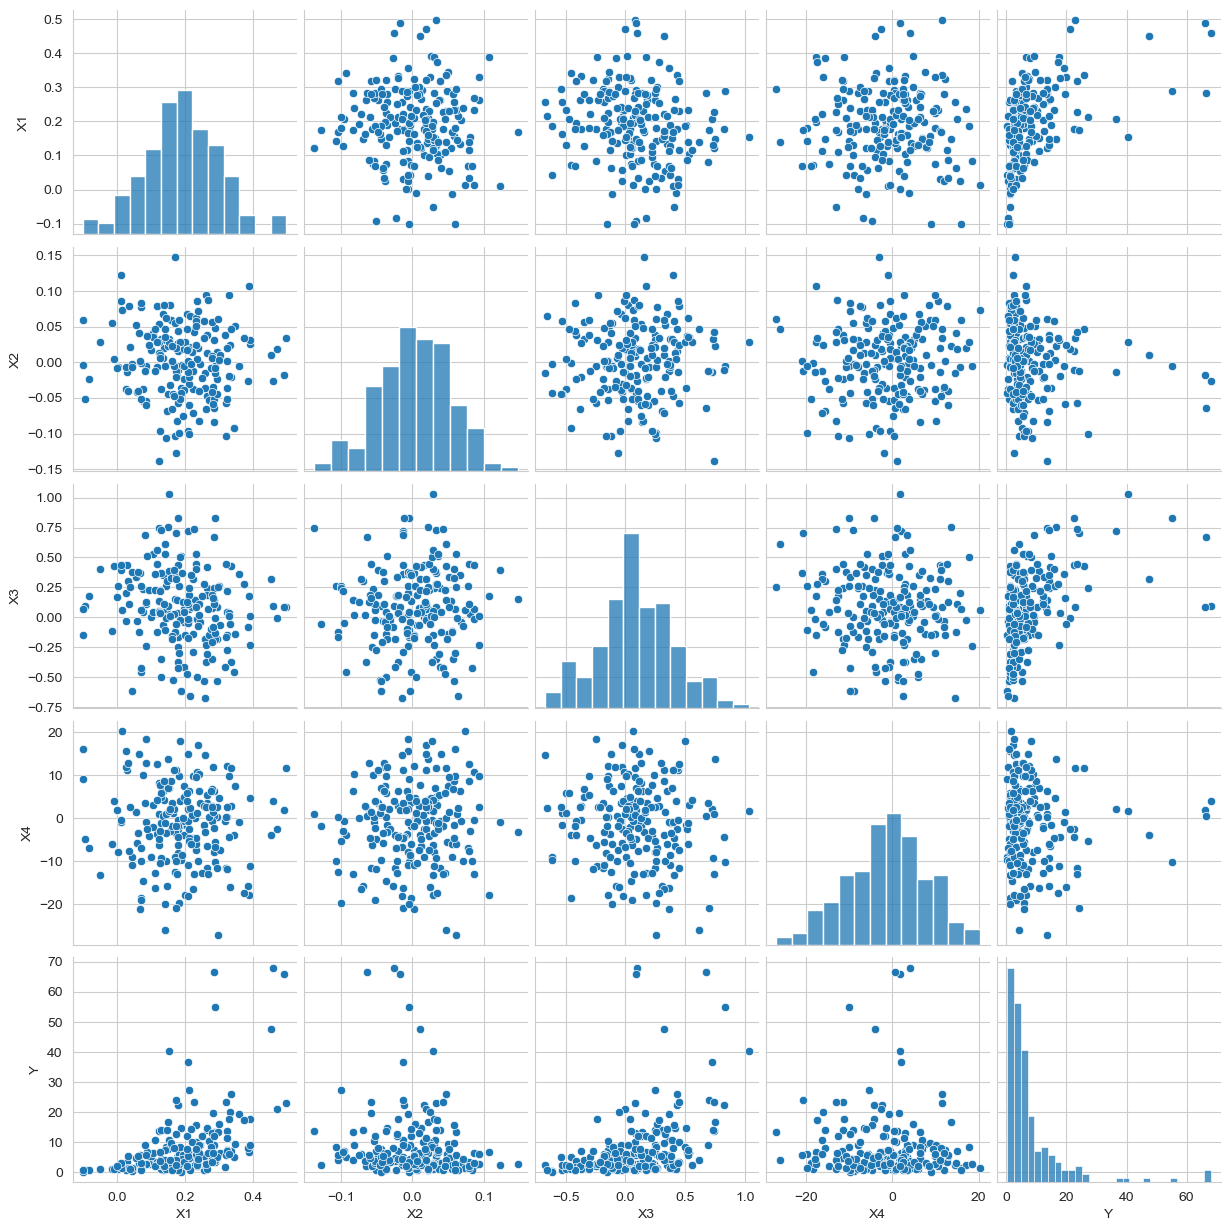

In [37]:
sns.pairplot(df2)
plt.show()

This time we see that Y is highly skewed. Let's see what happens if we ignore it.

In [38]:
model = smf.ols('Y ~ X1 + X2 + X3 + X4', df2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.497    
Dependent Variable: Y                AIC:                1386.2418
Date:               2022-12-09 12:58 BIC:                1402.7334
No. Observations:   200              Log-Likelihood:     -688.12  
Df Model:           4                F-statistic:        50.08    
Df Residuals:       195              Prob (F-statistic): 6.02e-29 
R-squared:          0.507            Scale:              58.478   
-------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept     -3.9401    1.1293  -3.4891  0.0006   -6.1672  -1.7130
X1            55.3615    5.0183  11.0318  0.0000   45.4643  65.2587
X2           -26.6331   10.8673  -2.4508  0.0151  -48.0655  -5.2006
X3            17.6882    1.7523  10.0941  0.0000   14.2323  21.1442
X4             0.0232    0.0595   0.3892  0.6975   -0.0942   0.1405
------------------------------------------------------------------
Omnibus:              158.065      Durbin-Watson:         1.923   
Prob(Omnibus):        0.000        Jarque-Bera (JB):      1800.374
Skew:                 3.022        Prob(JB):              0.000   
Kurtosis:             16.399       Condition No.:         186     
==================================================================

"""

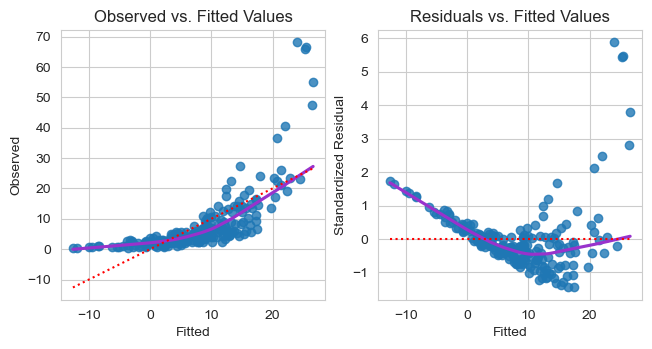

In [39]:
linearity_test(model, df2['Y'])
plt.show()


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  24.022560
p-value                         0.000079
f-value                         6.654829
f p-value                       0.000049

 Goldfeld-Quandt test ----
                value
F statistic  0.246911
p-value      1.000000

 Residuals plots ----


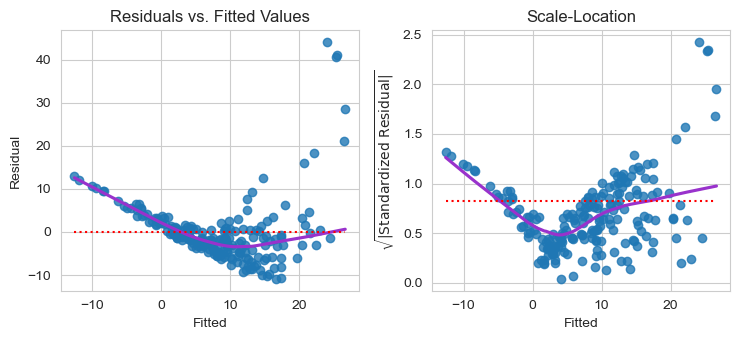

In [40]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.7394, p-value: 0.0000
D'Agostino-Pearson Omnibus test ---- statistic: 158.0651, p-value: 0.0000
Lilliefors test ---- statistic: 0.1672, p-value: 0.0010
Jarque-Bera test ---- statistic: 1800.3743, p-value: 0.0
Kolmogorov-Smirnov test ---- statistic: 0.1667, p-value: 0.0000
Anderson-Darling test ---- statistic: 10.6203, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


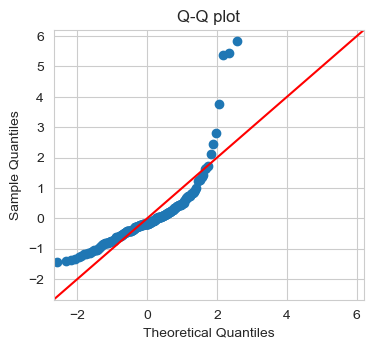

In [41]:
normality_of_residuals_test(model)
plt.show()

What does Box-Cox do with this?

In [42]:
y_t, lmbda, ci = stats.boxcox(df2['Y'], alpha=0.05)
print(lmbda, ci)

-0.008132765552362718 (-0.11455206241919771, 0.09865578458601561)


We could apply the Box-Cox transform directly. Or we could assume it's a log transform required because 0 is in the CI. I usually opt for the simpler way, but let's try Box-Cox first.

In [43]:
model = smf.ols('I(stats.boxcox(Y, lmbda)) ~ X1 + X2 + X3 + X4', df2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                     Results: Ordinary least squares
==========================================================================
Model:              OLS                       Adj. R-squared:     0.783   
Dependent Variable: I(stats.boxcox(Y, lmbda)) AIC:                279.6862
Date:               2022-12-09 12:58          BIC:                296.1778
No. Observations:   200                       Log-Likelihood:     -134.84 
Df Model:           4                         F-statistic:        180.7   
Df Residuals:       195                       Prob (F-statistic): 2.00e-64
R-squared:          0.788                     Scale:              0.23128 
-----------------------------------------------------------------------------
                Coef.     Std.Err.       t       P>|t|      [0.025     0.975]
-----------------------------------------------------------------------------
Intercept       0.0898      0.0710     1.2644    0.2076    -0.0503     0.2299
X1              6.6344      0.3156    21.0219    0.0000     6.0120     7.2569
X2             -3.5902      0.6834    -5.2532    0.0000    -4.9380    -2.2423
X3              2.0794      0.1102    18.8694    0.0000     1.8621     2.2968
X4              0.0019      0.0037     0.4973    0.6195    -0.0055     0.0092
--------------------------------------------------------------------------
Omnibus:                  3.543           Durbin-Watson:             2.263
Prob(Omnibus):            0.170           Jarque-Bera (JB):          3.475
Skew:                     -0.276          Prob(JB):                  0.176
Kurtosis:                 2.665           Condition No.:             186  
==========================================================================

"""

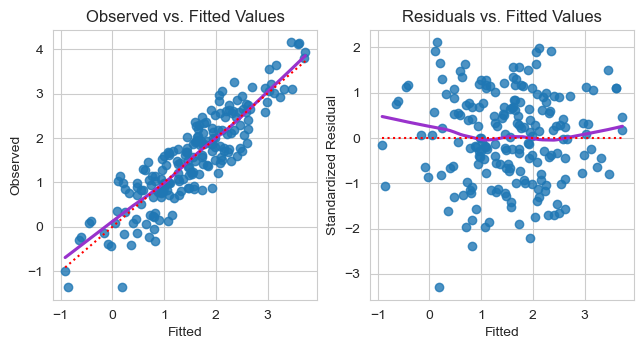

In [44]:
linearity_test(model, bc(df2['Y'], lmbda))
plt.show()


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  3.734085
p-value                        0.443188
f-value                        0.927500
f p-value                      0.449011

 Goldfeld-Quandt test ----
                value
F statistic  0.787275
p-value      0.877213

 Residuals plots ----


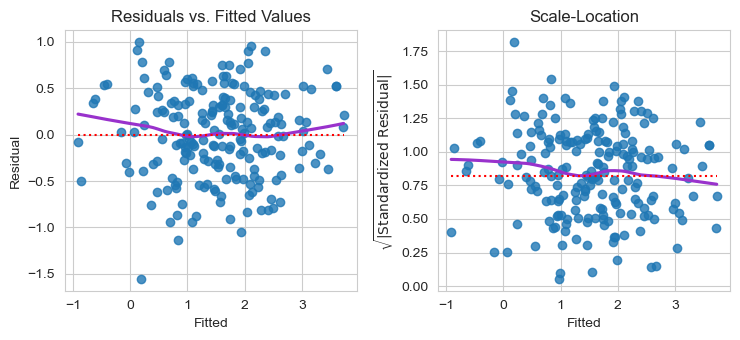

In [45]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9887, p-value: 0.1147
D'Agostino-Pearson Omnibus test ---- statistic: 3.5432, p-value: 0.1701
Lilliefors test ---- statistic: 0.0445, p-value: 0.4446
Jarque-Bera test ---- statistic: 3.4750, p-value: 0.1759595476094612
Kolmogorov-Smirnov test ---- statistic: 0.0443, p-value: 0.8106
Anderson-Darling test ---- statistic: 0.5437, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


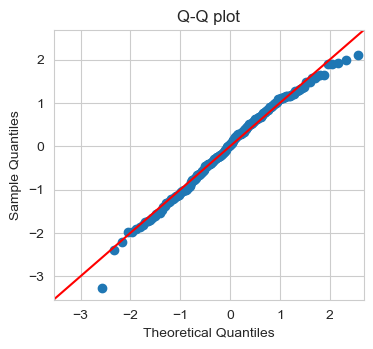

In [46]:
normality_of_residuals_test(model)
plt.show()

That looks really good. What if we had used the log transform?

In [47]:
model = smf.ols('I(np.log(Y)) ~ X1 + X2 + X3 + X4', df2).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.783   
Dependent Variable: I(np.log(Y))     AIC:                284.4730
Date:               2022-12-09 12:58 BIC:                300.9646
No. Observations:   200              Log-Likelihood:     -137.24 
Df Model:           4                F-statistic:        181.0   
Df Residuals:       195              Prob (F-statistic): 1.76e-64
R-squared:          0.788            Scale:              0.23688 
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
Intercept      0.0854    0.0719   1.1884  0.2361  -0.0563   0.2272
X1             6.7188    0.3194  21.0359  0.0000   6.0889   7.3487
X2            -3.6356    0.6917  -5.2564  0.0000  -4.9997  -2.2715
X3             2.1066    0.1115  18.8885  0.0000   1.8867   2.3266
X4             0.0019    0.0038   0.4913  0.6238  -0.0056   0.0093
-----------------------------------------------------------------
Omnibus:               3.630        Durbin-Watson:          2.264
Prob(Omnibus):         0.163        Jarque-Bera (JB):       3.447
Skew:                  -0.262       Prob(JB):               0.178
Kurtosis:              2.627        Condition No.:          186  
=================================================================

"""

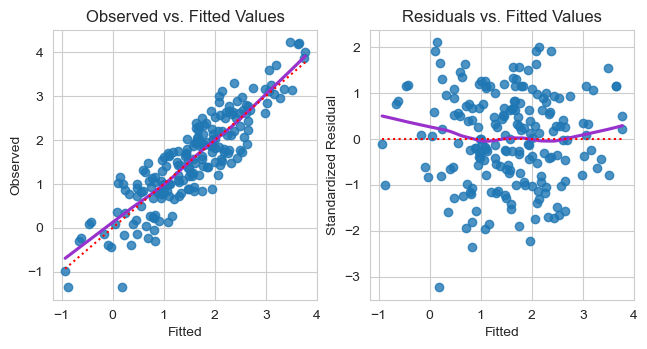

In [48]:
linearity_test(model, df2['Y'].apply(np.log))
plt.show()


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  3.182443
p-value                        0.527771
f-value                        0.788264
f p-value                      0.534054

 Goldfeld-Quandt test ----
                value
F statistic  0.788500
p-value      0.875675

 Residuals plots ----


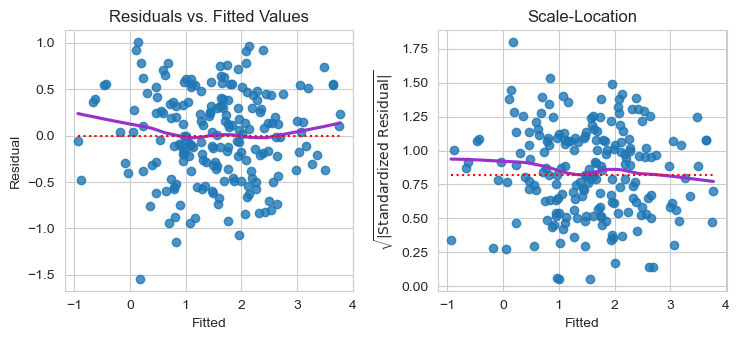

In [49]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9888, p-value: 0.1174
D'Agostino-Pearson Omnibus test ---- statistic: 3.6300, p-value: 0.1628
Lilliefors test ---- statistic: 0.0467, p-value: 0.3730
Jarque-Bera test ---- statistic: 3.4469, p-value: 0.17845063177709197
Kolmogorov-Smirnov test ---- statistic: 0.0471, p-value: 0.7477
Anderson-Darling test ---- statistic: 0.5481, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


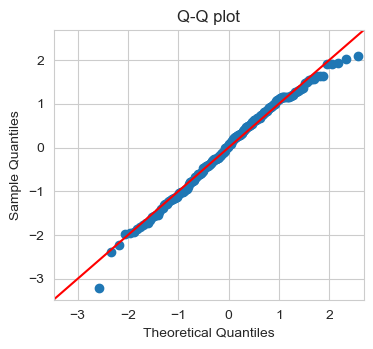

In [50]:
normality_of_residuals_test(model)
plt.show()

Pretty similar either way, but the log transform is simpler to use and report.

In [51]:
model.params

Intercept    0.085416
X1           6.718790
X2          -3.635611
X3           2.106615
X4           0.001861
dtype: float64

The true model was $e^y = 7x_1 – 3x_2 + 2x_3 + N(\mu=0, \sigma=0.5)$

## Data Set 3

In [52]:
df3 = pd.read_csv('example3.csv')

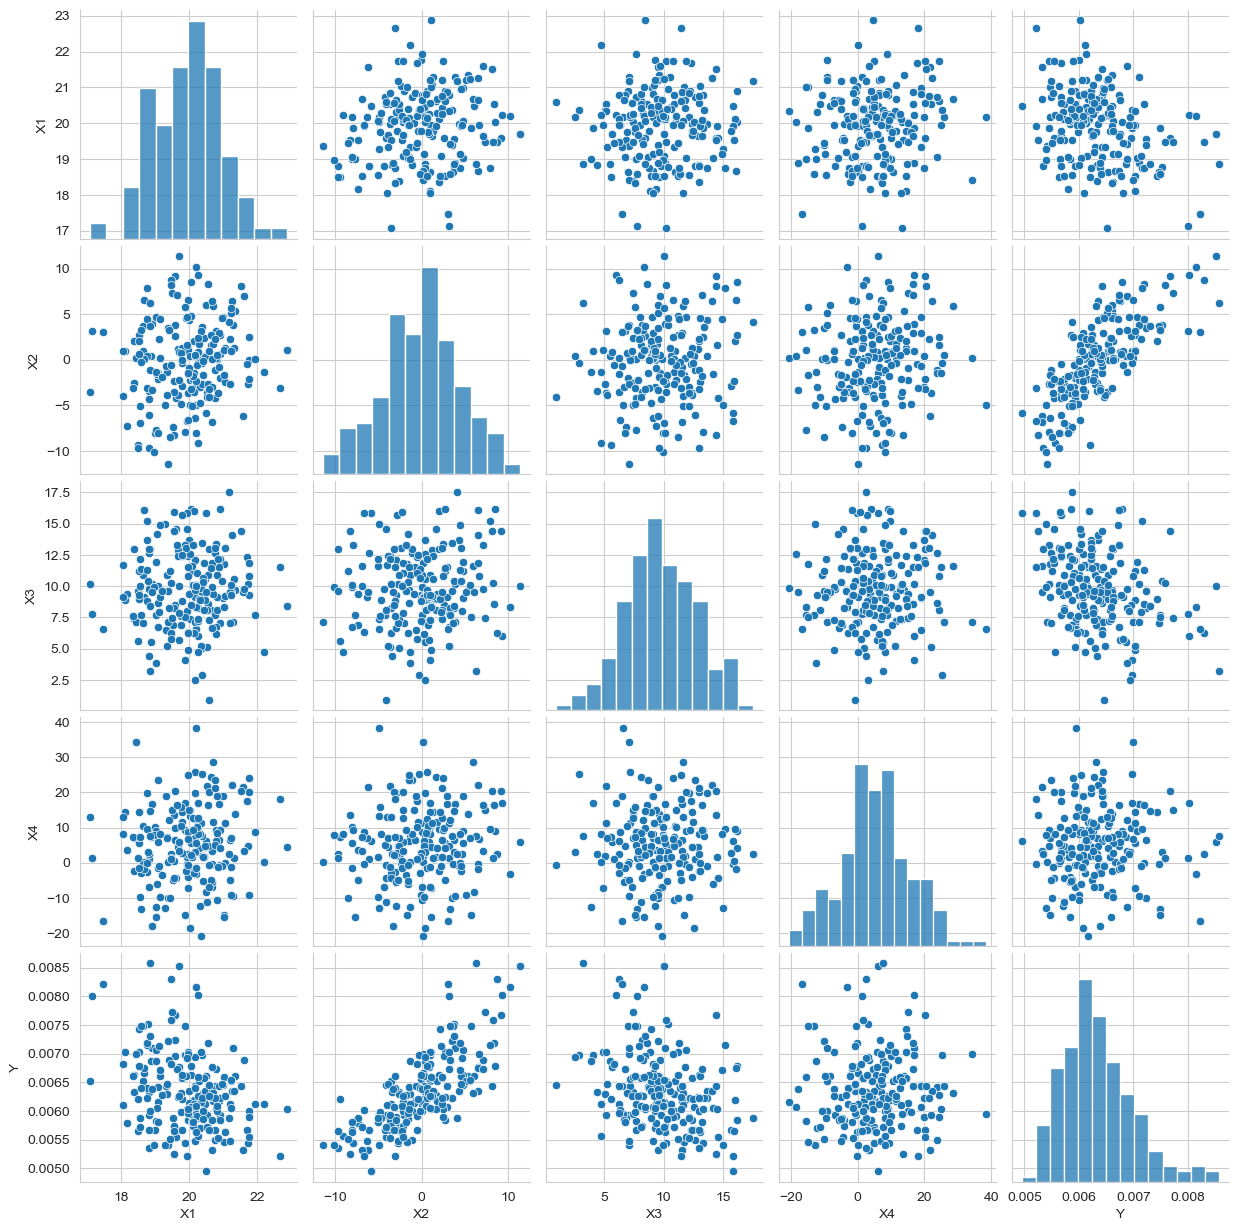

In [53]:
sns.pairplot(df3)
plt.show()

In [54]:
model = smf.ols('Y ~ X1 + X2 + X3 + X4', df3).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.910     
Dependent Variable: Y                AIC:                -2835.7744
Date:               2022-12-09 12:58 BIC:                -2819.2828
No. Observations:   200              Log-Likelihood:     1422.9    
Df Model:           4                F-statistic:        501.0     
Df Residuals:       195              Prob (F-statistic): 2.31e-101 
R-squared:          0.911            Scale:              3.9719e-08
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       0.0128    0.0003   44.5226  0.0000   0.0122   0.0134
X1             -0.0003    0.0000  -19.6303  0.0000  -0.0003  -0.0003
X2              0.0001    0.0000   39.3349  0.0000   0.0001   0.0001
X3             -0.0001    0.0000  -17.9809  0.0000  -0.0001  -0.0001
X4             -0.0000    0.0000   -1.1899  0.2355  -0.0000   0.0000
-------------------------------------------------------------------
Omnibus:                6.247        Durbin-Watson:           2.095
Prob(Omnibus):          0.044        Jarque-Bera (JB):        6.124
Skew:                   0.340        Prob(JB):                0.047
Kurtosis:               3.523        Condition No.:           471  
===================================================================

"""

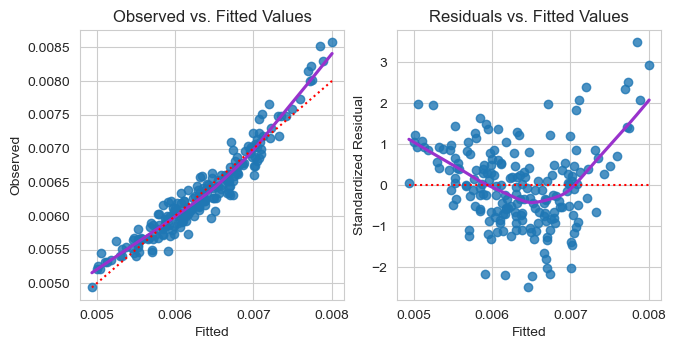

In [55]:
linearity_test(model, df3['Y'])
plt.show()


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  17.255184
p-value                         0.001724
f-value                         4.603087
f p-value                       0.001423

 Goldfeld-Quandt test ----
                value
F statistic  0.814946
p-value      0.839834

 Residuals plots ----


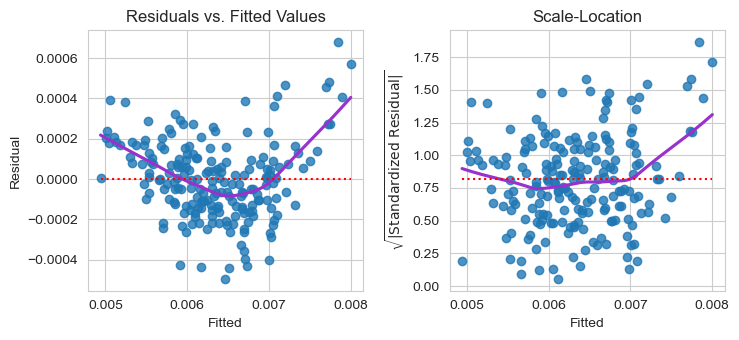

In [56]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9886, p-value: 0.1116
D'Agostino-Pearson Omnibus test ---- statistic: 6.2473, p-value: 0.0440
Lilliefors test ---- statistic: 0.0466, p-value: 0.3753
Jarque-Bera test ---- statistic: 6.1243, p-value: 0.046787063761240644
Kolmogorov-Smirnov test ---- statistic: 0.0447, p-value: 0.8026
Anderson-Darling test ---- statistic: 0.5391, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


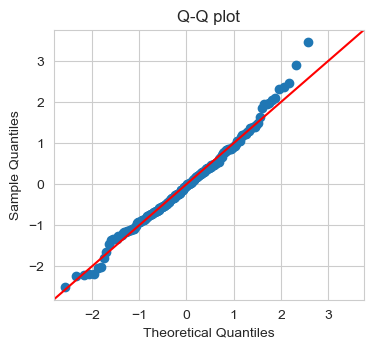

In [57]:
normality_of_residuals_test(model)
plt.show()

Ok, what does Box-Cox have to say?

In [58]:
y_t, lmbda, ci = stats.boxcox(df3['Y'], alpha=0.05)
print(lmbda, ci)

-1.7639832072348962 (-2.9265476540880626, -0.6263787376276613)


That's a pretty wide confidence interval, so we could try several things, or we could just push the easy button and use Box-Cox. 

The simple and common choice would be the inverse transform (-1) that is included in the CI.

In [59]:
model = smf.ols('I(bc(Y, lmbda)) ~ X1 + X2 + X3 + X4', df3).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.930    
Dependent Variable: I(bc(Y, lmbda))  AIC:                2690.7136
Date:               2022-12-09 12:58 BIC:                2707.2052
No. Observations:   200              Log-Likelihood:     -1340.4  
Df Model:           4                F-statistic:        661.8    
Df Residuals:       195              Prob (F-statistic): 3.22e-112
R-squared:          0.931            Scale:              39776.   
------------------------------------------------------------------
              Coef.   Std.Err.    t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------
Intercept   2781.4250 287.4421   9.6765 0.0000 2214.5305 3348.3195
X1          -308.8872  14.3107 -21.5843 0.0000 -337.1108 -280.6635
X2           146.3289   3.2247  45.3781 0.0000  139.9692  152.6886
X3           -99.9720   4.7158 -21.1993 0.0000 -109.2726  -90.6715
X4            -1.1844   1.3727  -0.8628 0.3893   -3.8917    1.5229
------------------------------------------------------------------
Omnibus:              6.550         Durbin-Watson:           2.179
Prob(Omnibus):        0.038         Jarque-Bera (JB):        7.270
Skew:                 -0.286        Prob(JB):                0.026
Kurtosis:             3.738         Condition No.:           471  
==================================================================

"""

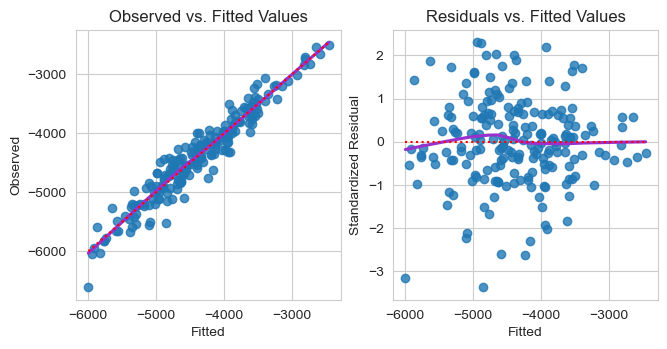

In [60]:
linearity_test(model, bc(df3['Y'],lmbda))
plt.show()


 Breusch-Pagan test ----
                                   value
Lagrange multiplier statistic  10.350841
p-value                         0.034915
f-value                         2.660721
f p-value                       0.033983

 Goldfeld-Quandt test ----
                value
F statistic  1.033854
p-value      0.435723

 Residuals plots ----


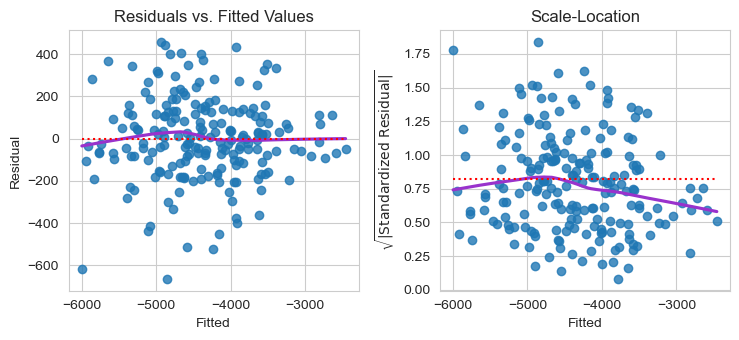

In [61]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9826, p-value: 0.0142
D'Agostino-Pearson Omnibus test ---- statistic: 6.5503, p-value: 0.0378
Lilliefors test ---- statistic: 0.0598, p-value: 0.0817
Jarque-Bera test ---- statistic: 7.2696, p-value: 0.026388862785190148
Kolmogorov-Smirnov test ---- statistic: 0.0592, p-value: 0.4670
Anderson-Darling test ---- statistic: 0.8582, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


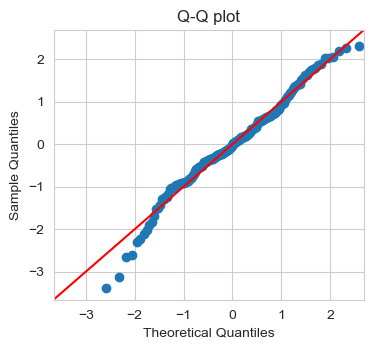

In [62]:
normality_of_residuals_test(model)
plt.show()

That's pretty good. Let's try an inverse transform for fun.

In [63]:
model = smf.ols('I(1/Y) ~ X1 + X2 + X3 + X4', df3).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.932    
Dependent Variable: I(1 / Y)         AIC:                1138.9191
Date:               2022-12-09 12:58 BIC:                1155.4107
No. Observations:   200              Log-Likelihood:     -564.46  
Df Model:           4                F-statistic:        681.0    
Df Residuals:       195              Prob (F-statistic): 2.40e-113
R-squared:          0.933            Scale:              16.980   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      7.7827    5.9390    1.3104  0.1916  -3.9302  19.4955
X1             6.5578    0.2957   22.1787  0.0000   5.9747   7.1409
X2            -3.0644    0.0666  -45.9932  0.0000  -3.1958  -2.9329
X3             2.0786    0.0974   21.3330  0.0000   1.8864   2.2708
X4             0.0282    0.0284    0.9954  0.3208  -0.0277   0.0842
------------------------------------------------------------------
Omnibus:               3.013        Durbin-Watson:           2.165
Prob(Omnibus):         0.222        Jarque-Bera (JB):        2.643
Skew:                  0.210        Prob(JB):                0.267
Kurtosis:              3.375        Condition No.:           471  
==================================================================

"""

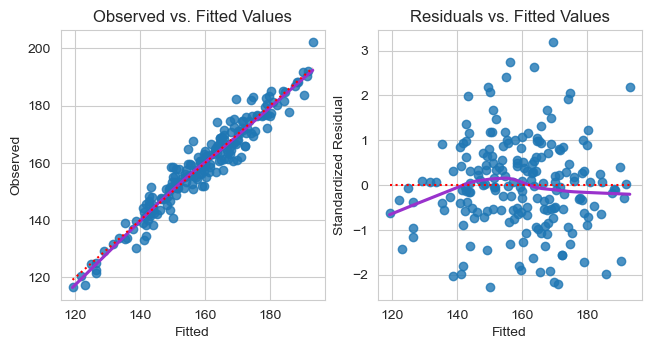

In [64]:
linearity_test(model, df3['Y'].apply(lambda xx: 1/xx))
plt.show()


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  5.251691
p-value                        0.262433
f-value                        1.314620
f p-value                      0.265910

 Goldfeld-Quandt test ----
                value
F statistic  1.049271
p-value      0.407585

 Residuals plots ----


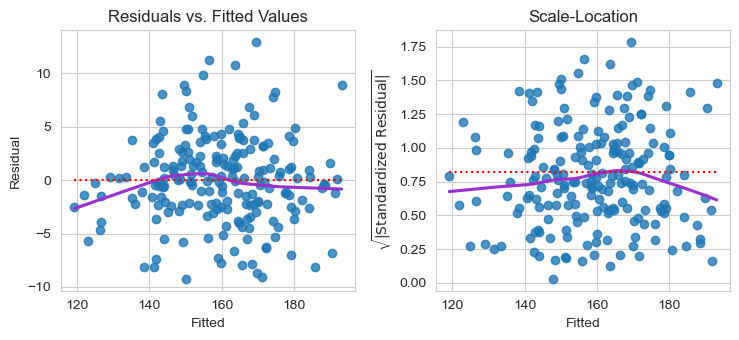

In [65]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9878, p-value: 0.0852
D'Agostino-Pearson Omnibus test ---- statistic: 3.0133, p-value: 0.2216
Lilliefors test ---- statistic: 0.0478, p-value: 0.3347
Jarque-Bera test ---- statistic: 2.6428, p-value: 0.26675898242307905
Kolmogorov-Smirnov test ---- statistic: 0.0473, p-value: 0.7448
Anderson-Darling test ---- statistic: 0.5958, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


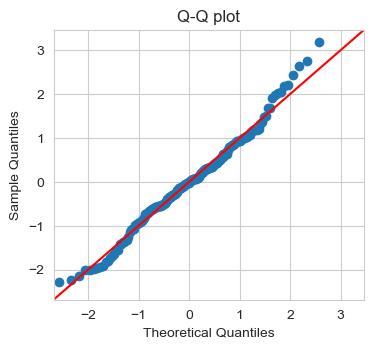

In [66]:
normality_of_residuals_test(model)
plt.show()

In [67]:
model.params

Intercept    7.782670
X1           6.557797
X2          -3.064350
X3           2.078595
X4           0.028232
dtype: float64

The true model was $\frac1y = 7x_1 – 3x_2 + 2x_3 + N(\mu=0, \sigma=4)$

## Data Set 4

In [68]:
df4 = pd.read_csv('example4.csv')

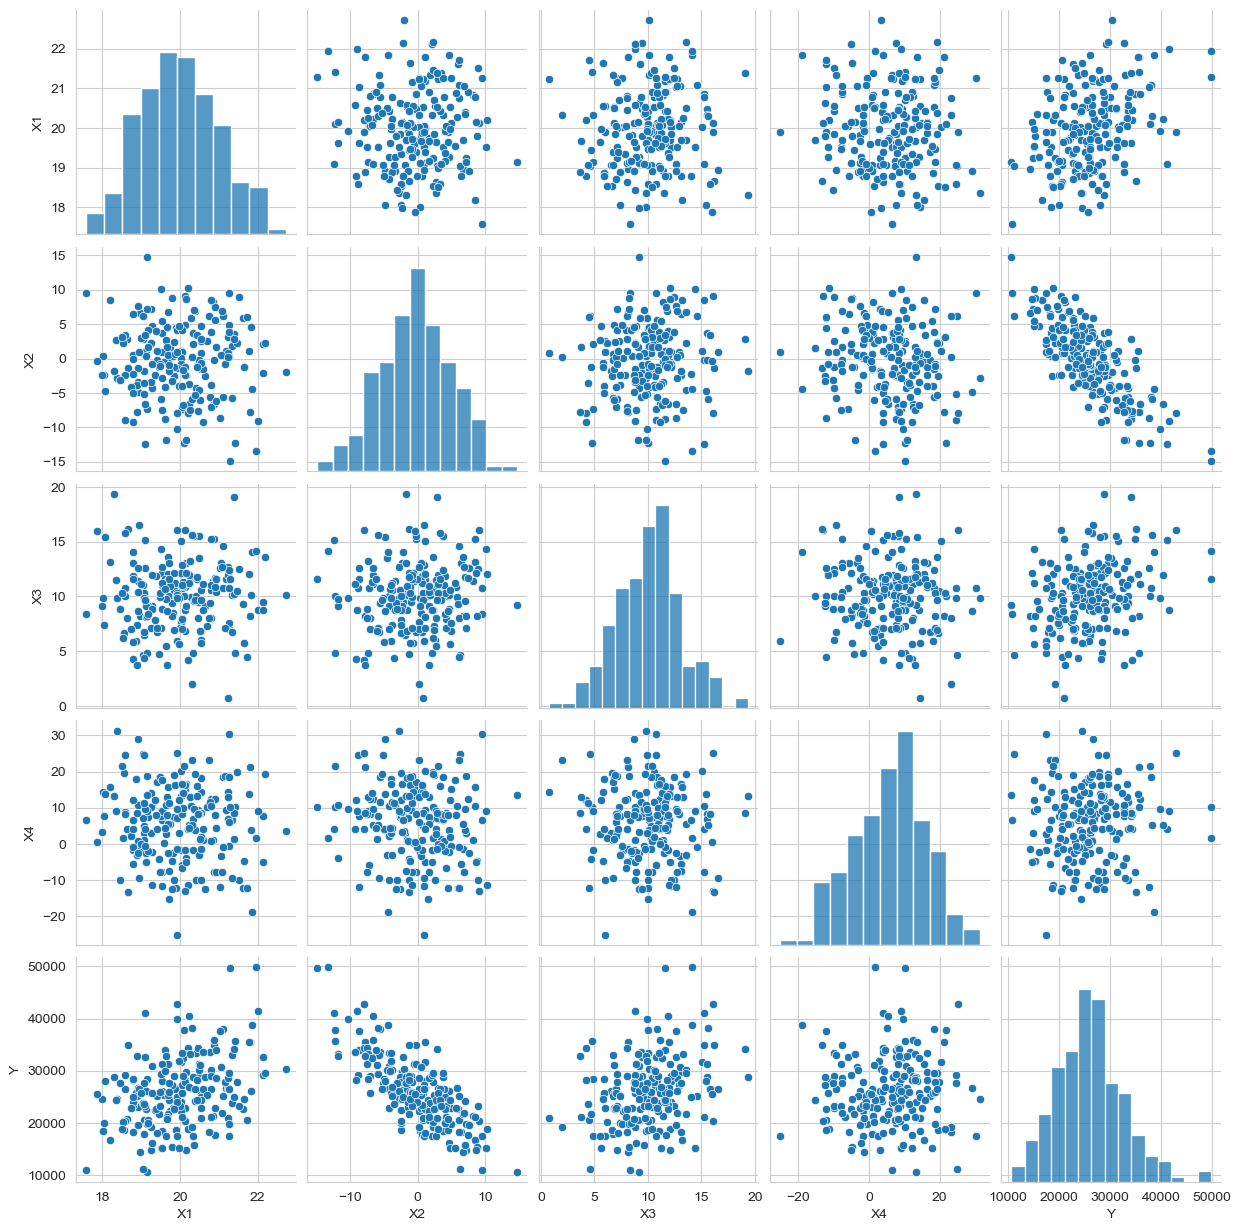

In [69]:
sns.pairplot(df4)
plt.show()

In [70]:
model = smf.ols('Y ~ X1 + X2 + X3 + X4', df4).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
=======================================================================
Model:                OLS               Adj. R-squared:      0.856     
Dependent Variable:   Y                 AIC:                 3704.0798 
Date:                 2022-12-09 12:58  BIC:                 3720.5714 
No. Observations:     200               Log-Likelihood:      -1847.0   
Df Model:             4                 F-statistic:         297.0     
Df Residuals:         195               Prob (F-statistic):  9.52e-82  
R-squared:            0.859             Scale:               6.3112e+06
-----------------------------------------------------------------------
             Coef.     Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------
Intercept -25925.6388 3586.8249  -7.2280 0.0000 -32999.5894 -18851.6882
X1          2212.6471  177.2786  12.4812 0.0000   1863.0174   2562.2768
X2          -997.8008   33.6704 -29.6344 0.0000  -1064.2056   -931.3959
X3           752.3719   57.9997  12.9720 0.0000    637.9847    866.7592
X4            -6.7121   17.6411  -0.3805 0.7040    -41.5039     28.0798
-----------------------------------------------------------------------
Omnibus:                2.722          Durbin-Watson:             2.025
Prob(Omnibus):          0.256          Jarque-Bera (JB):          2.617
Skew:                   0.217          Prob(JB):                  0.270
Kurtosis:               2.647          Condition No.:             471  
=======================================================================

"""

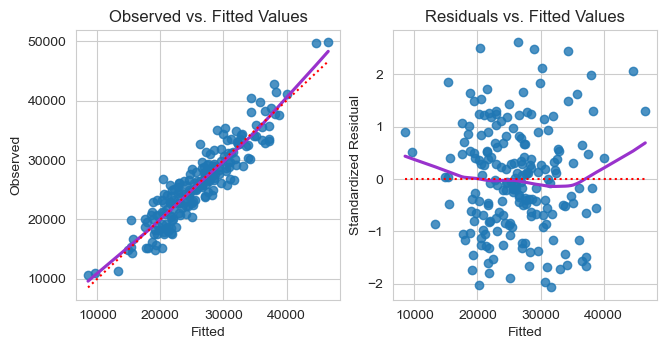

In [71]:
linearity_test(model, df4['Y'])
plt.show()


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  4.996300
p-value                        0.287677
f-value                        1.249051
f p-value                      0.291587

 Goldfeld-Quandt test ----
                value
F statistic  1.505838
p-value      0.023694

 Residuals plots ----


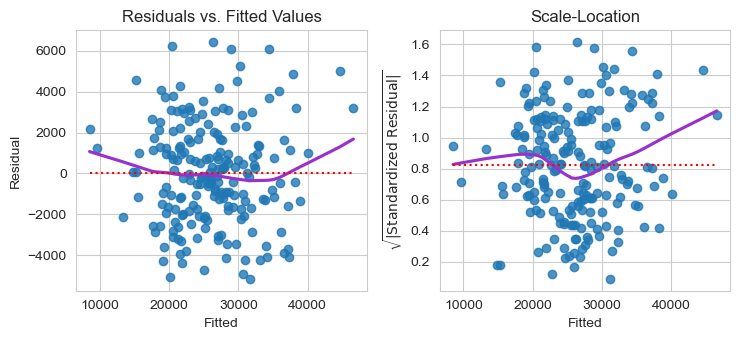

In [72]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9902, p-value: 0.1939
D'Agostino-Pearson Omnibus test ---- statistic: 2.7219, p-value: 0.2564
Lilliefors test ---- statistic: 0.0319, p-value: 0.9033
Jarque-Bera test ---- statistic: 2.6172, p-value: 0.27020469185513396
Kolmogorov-Smirnov test ---- statistic: 0.0334, p-value: 0.9732
Anderson-Darling test ---- statistic: 0.2873, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


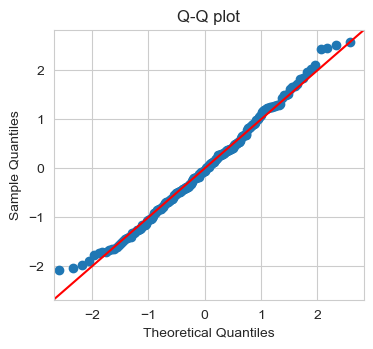

In [73]:
normality_of_residuals_test(model)
plt.show()

Ok, what does Box-Cox have to say?

In [74]:
y_t, lmbda, ci = stats.boxcox(df4['Y'], alpha=0.05)
print(lmbda, ci)

0.46629068447505684 (0.06589779449779172, 0.8731148698128975)


That's really close to 0.5, so I'd probably just use the square root transform at the start. You can experiment with Box-Cox if you like.

In [75]:
model = smf.ols('I(Y ** 0.5) ~ X1 + X2 + X3 + X4', df4).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.853    
Dependent Variable: I(Y ** 0.5)      AIC:                1397.4579
Date:               2022-12-09 12:58 BIC:                1413.9495
No. Observations:   200              Log-Likelihood:     -693.73  
Df Model:           4                F-statistic:        289.0    
Df Residuals:       195              Prob (F-statistic): 9.37e-81 
R-squared:          0.856            Scale:              61.851   
-------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025    0.975]
-------------------------------------------------------------------
Intercept     0.7752   11.2286    0.0690  0.9450  -21.3699  22.9204
X1            6.7832    0.5550   12.2226  0.0000    5.6887   7.8778
X2           -3.0890    0.1054  -29.3056  0.0000   -3.2969  -2.8811
X3            2.3132    0.1816   12.7400  0.0000    1.9551   2.6713
X4           -0.0359    0.0552   -0.6493  0.5169   -0.1448   0.0731
------------------------------------------------------------------
Omnibus:               1.350        Durbin-Watson:           1.958
Prob(Omnibus):         0.509        Jarque-Bera (JB):        1.270
Skew:                  0.068        Prob(JB):                0.530
Kurtosis:              2.634        Condition No.:           471  
==================================================================

"""

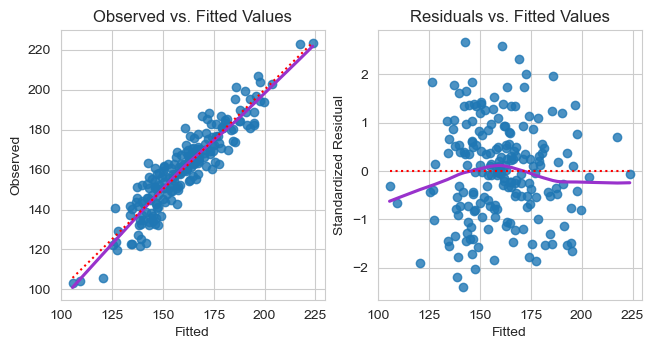

In [76]:
linearity_test(model, np.sqrt(df4['Y']))
plt.show()


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  5.074887
p-value                        0.279700
f-value                        1.269209
f p-value                      0.283476

 Goldfeld-Quandt test ----
                value
F statistic  1.348346
p-value      0.073523

 Residuals plots ----


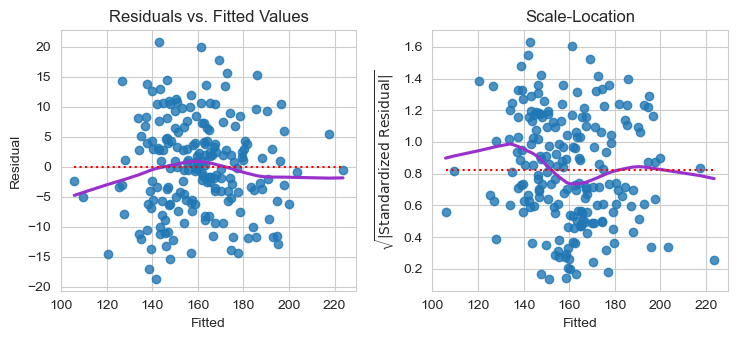

In [77]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9944, p-value: 0.6553
D'Agostino-Pearson Omnibus test ---- statistic: 1.3499, p-value: 0.5092
Lilliefors test ---- statistic: 0.0374, p-value: 0.7181
Jarque-Bera test ---- statistic: 1.2702, p-value: 0.5298950639202968
Kolmogorov-Smirnov test ---- statistic: 0.0356, p-value: 0.9538
Anderson-Darling test ---- statistic: 0.2443, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


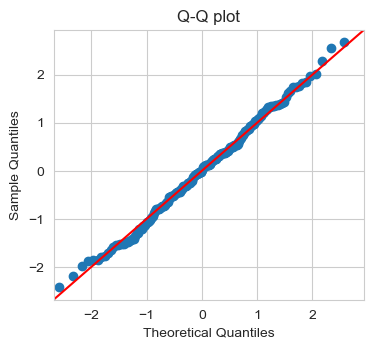

In [78]:
normality_of_residuals_test(model)
plt.show()

In [79]:
model.params

Intercept    0.775233
X1           6.783229
X2          -3.088985
X3           2.313203
X4          -0.035859
dtype: float64

The true model was $y^2 = 7x_1 – 3x_2 + 2x_3 + N(\mu=0, \sigma=8)$

## Data Set 5

In [80]:
df5 = pd.read_csv('example5.csv')

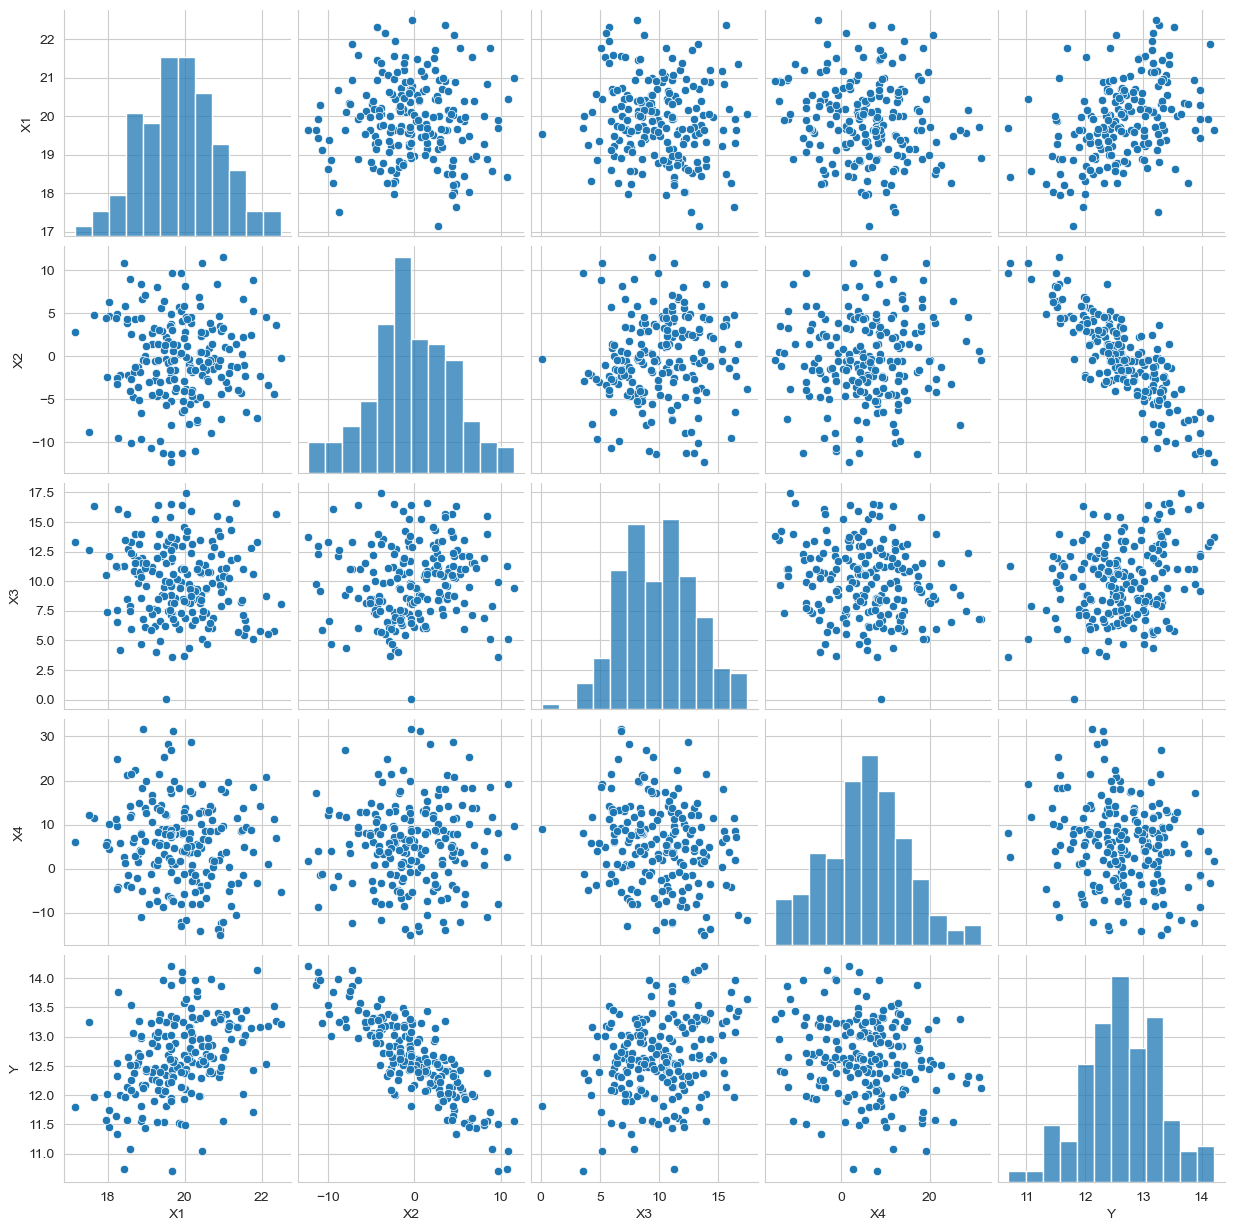

In [81]:
sns.pairplot(df5)
plt.show()

In [82]:
model = smf.ols('Y ~ X1 + X2 + X3 + X4', df5).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.984    
Dependent Variable: Y                AIC:                -415.0421
Date:               2022-12-09 12:58 BIC:                -398.5505
No. Observations:   200              Log-Likelihood:     212.52   
Df Model:           4                F-statistic:        3039.    
Df Residuals:       195              Prob (F-statistic): 2.11e-174
R-squared:          0.984            Scale:              0.0071706
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      6.3838    0.1240   51.4746  0.0000   6.1392   6.6283
X1             0.2729    0.0060   45.7990  0.0000   0.2612   0.2847
X2            -0.1197    0.0013  -95.5681  0.0000  -0.1222  -0.1172
X3             0.0796    0.0020   40.0909  0.0000   0.0757   0.0835
X4            -0.0004    0.0007   -0.5410  0.5891  -0.0017   0.0009
------------------------------------------------------------------
Omnibus:              1.262         Durbin-Watson:           1.997
Prob(Omnibus):        0.532         Jarque-Bera (JB):        1.203
Skew:                 -0.189        Prob(JB):                0.548
Kurtosis:             2.956         Condition No.:           480  
==================================================================

"""

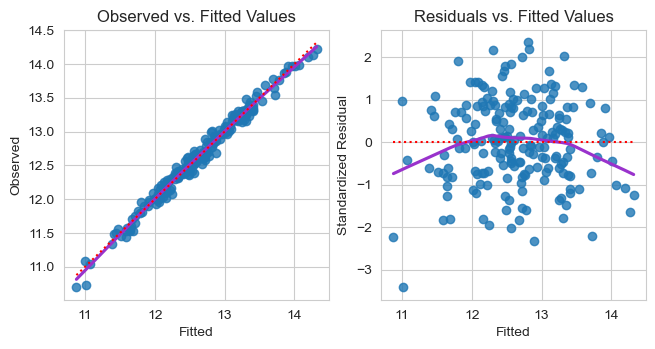

In [83]:
linearity_test(model, df5['Y'])
plt.show()


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  4.068536
p-value                        0.396810
f-value                        1.012299
f p-value                      0.402204

 Goldfeld-Quandt test ----
                value
F statistic  0.798455
p-value      0.862771

 Residuals plots ----


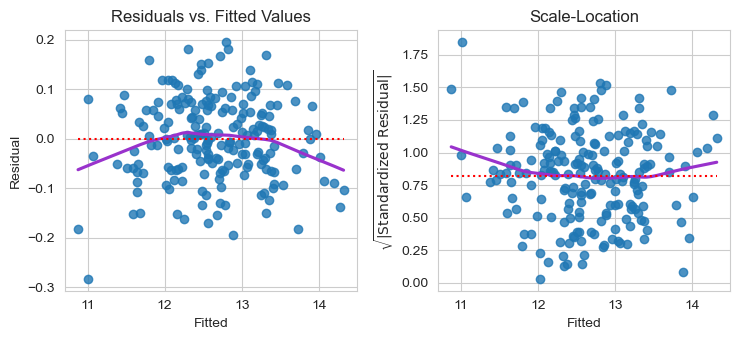

In [84]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9945, p-value: 0.6785
D'Agostino-Pearson Omnibus test ---- statistic: 1.2620, p-value: 0.5321
Lilliefors test ---- statistic: 0.0412, p-value: 0.5678
Jarque-Bera test ---- statistic: 1.2033, p-value: 0.5479115744462834
Kolmogorov-Smirnov test ---- statistic: 0.0432, p-value: 0.8343
Anderson-Darling test ---- statistic: 0.2160, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


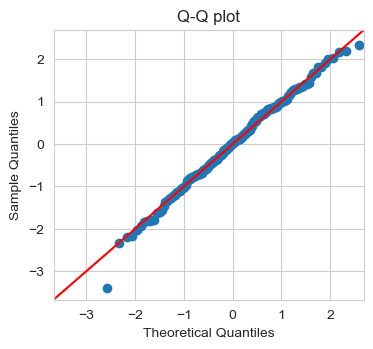

In [85]:
normality_of_residuals_test(model)
plt.show()

Honestly that's not too bad without a transform, but what does Box-Cox have to say?

In [86]:
y_t, lmbda, ci = stats.boxcox(df5['Y'], alpha=0.05)
print(lmbda, ci)

2.059339251474144 (-0.08596176948418356, 4.250307914547179)


That's really close to 2, so I'd probably just use the square transform at the start. You can experiment with Box-Cox if you like.

In [87]:
model = smf.ols('I(Y ** 2) ~ X1 + X2 + X3 + X4', df5).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.985    
Dependent Variable: I(Y ** 2)        AIC:                860.8772 
Date:               2022-12-09 12:58 BIC:                877.3688 
No. Observations:   200              Log-Likelihood:     -425.44  
Df Model:           4                F-statistic:        3274.    
Df Residuals:       195              Prob (F-statistic): 1.65e-177
R-squared:          0.985            Scale:              4.2284   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept      3.2809    3.0116    1.0894  0.2773  -2.6586   9.2204
X1             6.8336    0.1447   47.2250  0.0000   6.5482   7.1190
X2            -3.0176    0.0304  -99.2080  0.0000  -3.0776  -2.9576
X3             2.0225    0.0482   41.9346  0.0000   1.9273   2.1176
X4            -0.0113    0.0160   -0.7078  0.4799  -0.0430   0.0203
------------------------------------------------------------------
Omnibus:              1.272         Durbin-Watson:           1.956
Prob(Omnibus):        0.530         Jarque-Bera (JB):        1.209
Skew:                 -0.060        Prob(JB):                0.546
Kurtosis:             2.639         Condition No.:           480  
==================================================================

"""

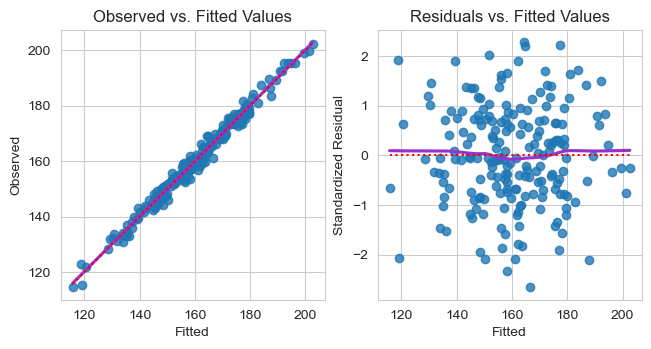

In [88]:
linearity_test(model, df5['Y'].apply(lambda xx: xx**2))
plt.show()


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  0.626293
p-value                        0.960098
f-value                        0.153138
f p-value                      0.961414

 Goldfeld-Quandt test ----
                value
F statistic  0.756422
p-value      0.912239

 Residuals plots ----


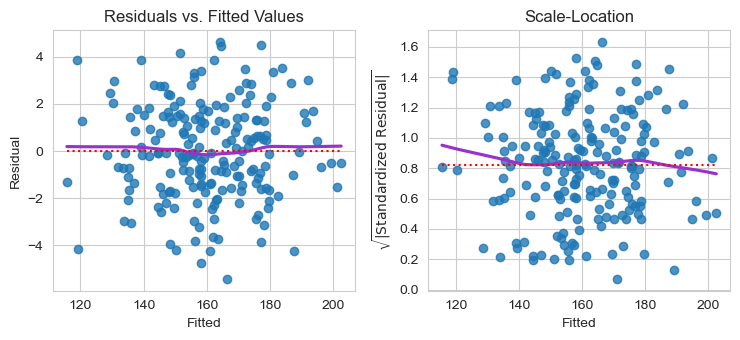

In [89]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9943, p-value: 0.6507
D'Agostino-Pearson Omnibus test ---- statistic: 1.2716, p-value: 0.5295
Lilliefors test ---- statistic: 0.0428, p-value: 0.5024
Jarque-Bera test ---- statistic: 1.2090, p-value: 0.5463507838103823
Kolmogorov-Smirnov test ---- statistic: 0.0427, p-value: 0.8437
Anderson-Darling test ---- statistic: 0.2278, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


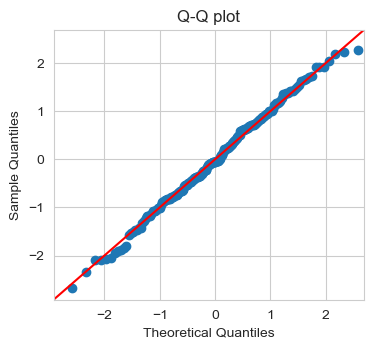

In [90]:
normality_of_residuals_test(model)
plt.show()

In [91]:
model.params

Intercept    3.280899
X1           6.833631
X2          -3.017607
X3           2.022460
X4          -0.011350
dtype: float64

The true model was $\sqrt{y} = 7x_1 – 3x_2 + 2x_3 + N(\mu=0, \sigma=2)$

## Example 6: the weird one

In [92]:
df6 = pd.read_csv('example6.csv')

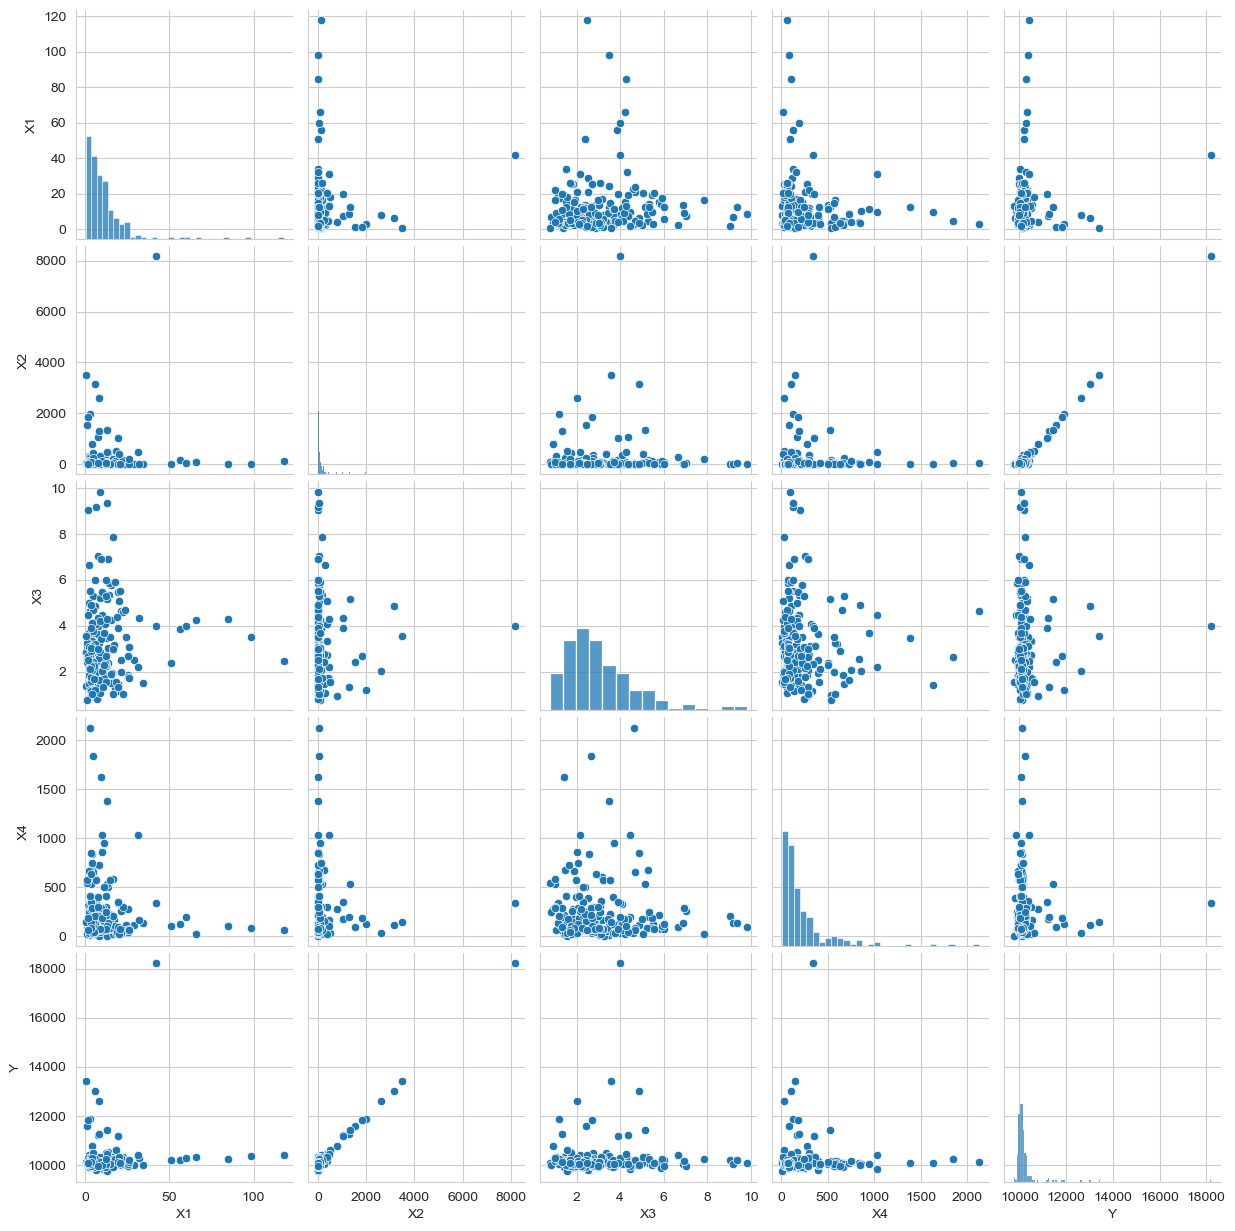

In [93]:
sns.pairplot(df6)
plt.show()

In [94]:
model = smf.ols('Y ~ X1 + X2 + X3 + X4', df6).fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.981    
Dependent Variable: Y                AIC:                2420.4630
Date:               2022-12-09 12:58 BIC:                2436.9546
No. Observations:   200              Log-Likelihood:     -1205.2  
Df Model:           4                F-statistic:        2513.    
Df Residuals:       195              Prob (F-statistic): 1.67e-166
R-squared:          0.981            Scale:              10299.   
------------------------------------------------------------------
            Coef.    Std.Err.    t     P>|t|    [0.025    0.975]  
------------------------------------------------------------------
Intercept 10009.4139  17.5457 570.4773 0.0000 9974.8102 10044.0175
X1            2.6870   0.4864   5.5243 0.0000    1.7277     3.6463
X2            0.9804   0.0098  99.5412 0.0000    0.9610     0.9998
X3            4.0938   4.3665   0.9376 0.3496   -4.5177    12.7054
X4           -0.0006   0.0240  -0.0245 0.9804   -0.0480     0.0468
------------------------------------------------------------------
Omnibus:              1.964         Durbin-Watson:           1.880
Prob(Omnibus):        0.375         Jarque-Bera (JB):        1.780
Skew:                 -0.011        Prob(JB):                0.411
Kurtosis:             3.462         Condition No.:           1890 
==================================================================
* The condition number is large (2e+03). This might indicate
strong multicollinearity or other numerical problems.
"""

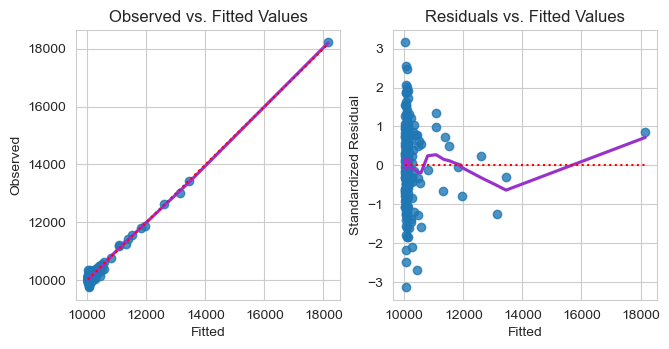

In [95]:
linearity_test(model, df6['Y'])
plt.show()


 Breusch-Pagan test ----
                                  value
Lagrange multiplier statistic  1.059767
p-value                        0.900602
f-value                        0.259694
f p-value                      0.903468

 Goldfeld-Quandt test ----
                value
F statistic  0.680566
p-value      0.968895

 Residuals plots ----


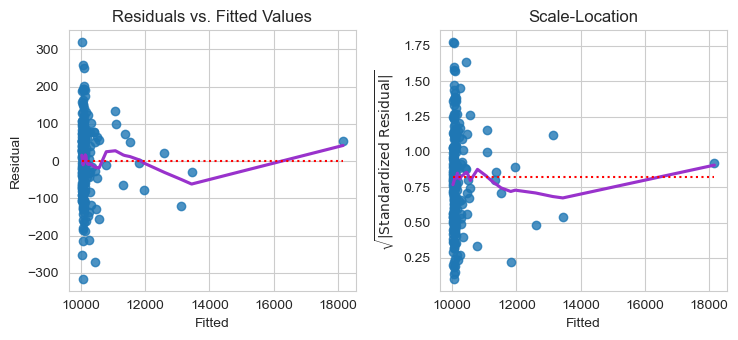

In [96]:
homoscedasticity_test(model)
plt.show()

Shapiro-Wilk test ---- statistic: 0.9963, p-value: 0.9144
D'Agostino-Pearson Omnibus test ---- statistic: 1.9636, p-value: 0.3746
Lilliefors test ---- statistic: 0.0322, p-value: 0.8946
Jarque-Bera test ---- statistic: 1.7799, p-value: 0.4106709632651113
Kolmogorov-Smirnov test ---- statistic: 0.0329, p-value: 0.9774
Anderson-Darling test ---- statistic: 0.1991, 5% critical value: 0.7720
If the returned AD statistic is larger than the critical value, then for the 5% significance level, the null hypothesis that the data come from the Normal distribution should be rejected. 


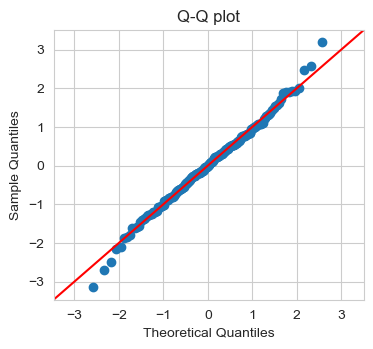

In [97]:
normality_of_residuals_test(model)
plt.show()

Ok, so what transformation should we apply here? Well... maybe none. The results are weird because the inputs are weird. We could transform the predictor variables too, though, to make this look nicer. Let's give that a try, though I don't expect you to transform predictor variables.

In [98]:
x1_t, lmbda, ci = stats.boxcox(df6['X1'], alpha=0.05)
print(lmbda, ci)

-0.015234829179329492 (-0.13325849177721508, 0.10177301375615828)


In [99]:
x2_t, lmbda, ci = stats.boxcox(df6['X2'], alpha=0.05)
print(lmbda, ci)

0.0009066615123644702 (-0.046058993654999006, 0.04914202535170723)


In [100]:
x3_t, lmbda, ci = stats.boxcox(df6['X3'], alpha=0.05)
print(lmbda, ci)

-0.020725621798245535 (-0.2552369359830221, 0.21300248277013079)


In [101]:
x4_t, lmbda, ci = stats.boxcox(df6['X4'], alpha=0.05)
print(lmbda, ci)

-0.021874003966339508 (-0.1305512271150244, 0.08787632922926007)


In [102]:
model = smf.ols('Y ~ I(np.log(X1)) + I(np.log(X2)) + I(np.log(X3)) + I(np.log(X4))', df6).fit()

In [103]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.246     
Dependent Variable: Y                AIC:                3152.4280 
Date:               2022-12-09 12:58 BIC:                3168.9196 
No. Observations:   200              Log-Likelihood:     -1571.2   
Df Model:           4                F-statistic:        17.19     
Df Residuals:       195              Prob (F-statistic): 4.26e-12  
R-squared:          0.261            Scale:              4.0014e+05
-------------------------------------------------------------------
                Coef.   Std.Err.    t    P>|t|    [0.025    0.975] 
-------------------------------------------------------------------
Intercept     9410.2383 278.7714 33.7561 0.0000 8860.4443 9960.0324
I(np.log(X1))   53.2154  48.8823  1.0886 0.2777  -43.1905  149.6214
I(np.log(X2))  174.8593  21.2297  8.2366 0.0000  132.9900  216.7285
I(np.log(X3))   33.3211  89.7412  0.3713 0.7108 -143.6669  210.3090
I(np.log(X4))   32.5055  43.6820  0.7441 0.4577  -53.6443  118.6553
-------------------------------------------------------------------
Omnibus:              305.813      Durbin-Watson:         2.060    
Prob(Omnibus):        0.000        Jarque-Bera (JB):      41276.855
Skew:                 6.994        Prob(JB):              0.000    
Kurtosis:             71.975       Condition No.:         41       
===================================================================

"""

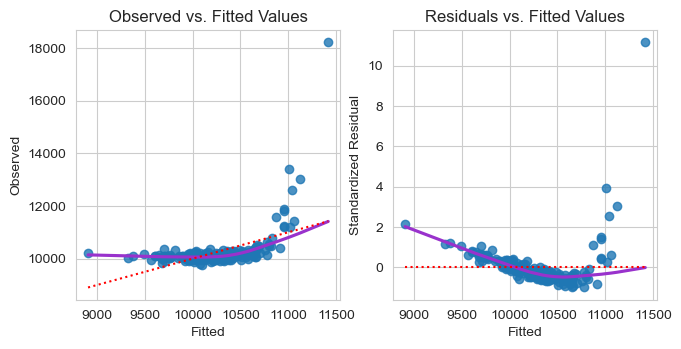

In [104]:
linearity_test(model, df6['Y'])
plt.show()

Oh no! Ok, what happened? Now it looks like we need a transform on Y.

In [105]:
y_t, lmbda, ci = stats.boxcox(df6['Y'], alpha=0.05)
print(lmbda, ci)

-22.970275536691812 (-26.919490417156247, -19.363294578166304)


In [106]:
model = smf.ols('I(bc(Y, -23)) ~ I(np.log(X1)) + I(np.log(X2)) + I(np.log(X3)) + I(np.log(X4))', df6).fit()

In [107]:
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Ordinary least squares
===========================================================================
Model:                 OLS                Adj. R-squared:       -41.703    
Dependent Variable:    I(bc(Y, -23))      AIC:                  -14479.3858
Date:                  2022-12-09 12:58   BIC:                  -14462.8943
No. Observations:      200                Log-Likelihood:       7244.7     
Df Model:              4                  F-statistic:          -47.58     
Df Residuals:          195                Prob (F-statistic):   1.00       
R-squared:             -40.845            Scale:                2.0664e-33 
---------------------------------------------------------------------------
               Coef.  Std.Err.           t           P>|t|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept      0.0435   0.0000 2170314453243341.7500 0.0000  0.0435  0.0435
I(np.log(X1)) -0.0000   0.0000               -2.9630 0.0034 -0.0000 -0.0000
I(np.log(X2))  0.0000   0.0000                3.9797 0.0001  0.0000  0.0000
I(np.log(X3)) -0.0000   0.0000               -0.2690 0.7882 -0.0000  0.0000
I(np.log(X4)) -0.0000   0.0000               -0.6217 0.5349 -0.0000  0.0000
---------------------------------------------------------------------------
Omnibus:                 4.027            Durbin-Watson:              0.323
Prob(Omnibus):           0.133            Jarque-Bera (JB):           4.324
Skew:                    -0.163           Prob(JB):                   0.115
Kurtosis:                3.642            Condition No.:              41   
===========================================================================

"""

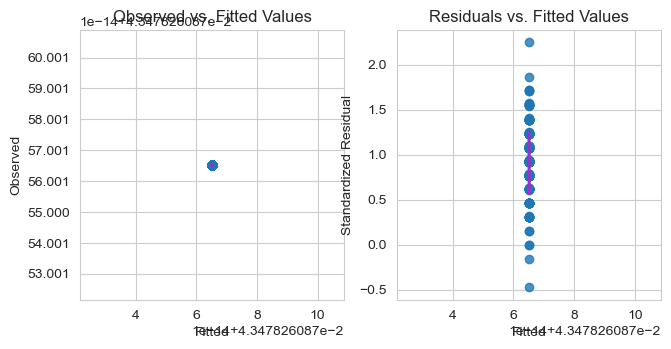

In [108]:
linearity_test(model, bc(df6['Y'], -23))
plt.show()

This is where you start to realize it has all gone wrong. If you try to transform everything, it can often go awry. The fact is, this was always a linear model on crazy inputs - the first model was correct!

In [109]:
model = smf.ols('Y ~ X1 + X2 + X3 + X4', df6).fit()

In [110]:
model.params

Intercept    10009.413871
X1               2.686983
X2               0.980378
X3               4.093827
X4              -0.000590
dtype: float64

The true model was $y = 10,000 + 3x_1 + x_2 + 2x_3 + N(\mu=0, \sigma=100)$